#Import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
data = pd.read_excel('/content/Canada.xlsx')

In [ ]:
data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
#Let's clean the data set to remove a few unnecessary columns. We can use pandas drop() method as follows:
data.drop(['Type','Coverage','AREA','REG','DEV','DevName'], axis=1,inplace=True)
data.head()

,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
#Let's rename the columns
data.rename(columns={'OdName':'country', 'AreaName':'continent','RegName':'region'}, inplace=True)
data.head()

,country,continent,region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
#We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:
data['Total_'] = data.sum(axis=1)
data.head()

<ipython-input-114-f46b3de78e26>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,country,continent,region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
# check any null value
data.isnull().sum()

country      0
continent    0
region       0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total_       0
dtype: int64

In [ ]:
#Finally, let's view a quick summary of each column
data.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,730.290816,656.331633,618.239796,455.025510,450.367347,430.336735,506.892857,775.892857,824.413265,977.295918,...,1337.969388,1283.877551,1207.923469,1261.448980,1286.581633,1432.076531,1269.122449,1315.831633,1321.535714,35327.612245
std,3664.971286,2484.869895,2198.843498,1529.175952,1580.492649,1469.775915,1529.161726,2415.374270,2883.263236,3164.973367,...,4421.525944,3923.791864,3442.092092,3691.110002,3822.816364,4454.546970,4020.795822,4236.731113,4227.087570,97814.332441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.750000,1.000000,1.000000,...,28.750000,25.500000,31.500000,31.500000,36.500000,41.250000,37.750000,42.750000,45.000000,952.000000
50%,13.500000,10.000000,11.500000,12.000000,13.500000,17.000000,19.500000,29.500000,35.000000,44.500000,...,210.500000,224.000000,198.000000,205.000000,215.500000,213.500000,187.500000,234.000000,215.000000,5442.000000
75%,263.000000,296.750000,292.250000,181.250000,189.000000,199.000000,257.000000,451.250000,426.500000,526.750000,...,852.500000,849.250000,940.500000,956.250000,907.250000,938.000000,815.750000,790.000000,826.500000,22795.500000
max,44000.000000,24796.000000,20620.000000,13635.000000,14855.000000,14368.000000,13303.000000,21337.000000,27359.000000,27118.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


# Indexing and Selection (slicing)

There are two ways to filter on a column name:

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.

    df.column_name               # returns series
Method 2: More robust, and can filter on multiple columns.

    df['column']                  # returns series
    df[['column 1', 'column 2']]  # returns dataframe

In [ ]:
data[['country']]

,country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
191,Western Sahara
192,Yemen
193,Zambia
194,Zimbabwe


Select Row
There are main 2 ways to select rows:

    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
Before we proceed, notice that the default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country.

This can be fixed very easily by setting the 'Country' column as the index using set_index() method.

In [ ]:
data.set_index('country', inplace=True)

In [ ]:
data.head(2)
# optional: to remove the name of the index
#data.index.name = None

,continent,region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699


In [ ]:
data.loc[['Afghanistan']]

,continent,region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639


In [ ]:
# alternate methods
data.iloc[0]

continent             Asia
region       Southern Asia
1980                    16
1981                    39
1982                    39
1983                    47
1984                    71
1985                   340
1986                   496
1987                   741
1988                   828
1989                  1076
1990                  1028
1991                  1378
1992                  1170
1993                   713
1994                   858
1995                  1537
1996                  2212
1997                  2555
1998                  1999
1999                  2395
2000                  3326
2001                  4067
2002                  3697
2003                  3479
2004                  2978
2005                  3436
2006                  3009
2007                  2652
2008                  2111
2009                  1746
2010                  1758
2011                  2203
2012                  2635
2013                  2004
Total_               58639
N

In [ ]:
data[data.index == 'Afghanistan']

,continent,region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639


In [ ]:
# 3. for years 1980 to 1985
data.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]]

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

In [ ]:
data.columns = list(map(str,data.columns))

In [ ]:
#Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

#Visualizing Data using Matplotlib

first importing matplotlib and matplotlib.pyplot

**Plotting in pandas**

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in pandas is as simple as appending a .plot() method to a series or dataframe.

##**Line Pots (Series/Dataframe)**

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.


In [ ]:
 #to check no of immeregent come canada from countryname
country = data.loc['Japan',years]
country

1980     701
1981     756
1982     598
1983     309
1984     246
1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
2000    1010
2001    1092
2002     806
2003     817
2004     973
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: object

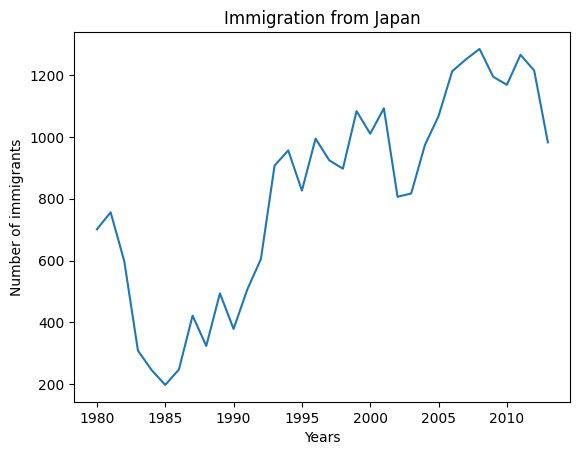

In [ ]:
country.plot(kind='line')

plt.title('Immigration from Japan')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

In [ ]:
df_CI = data.loc[['India', 'China'], years]
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [ ]:
df_CI = df_CI.transpose()
df_CI.head()

country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


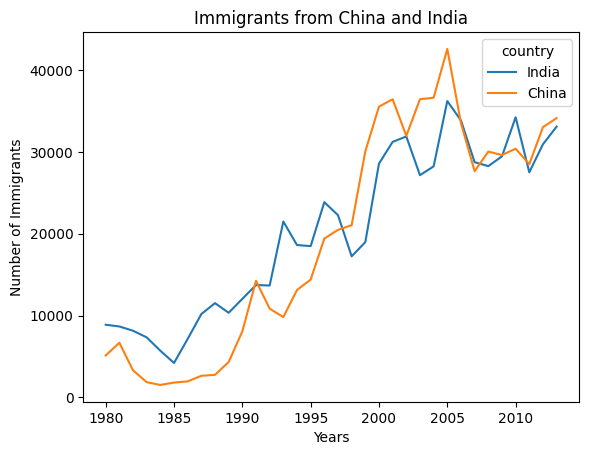

In [ ]:
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Other Plots**

Congratulations! you have learned how to wrangle data with python and create a line plot with Matplotlib. There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing kind keyword to plot(). The full list of available plots are as follows:

- bar for vertical bar plots
- barh for horizontal bar plots
- hist for histogram
- box for boxplot
- kde or density for density plots
- area for area plots
- pie for pie plots
- scatter for scatter plots
- hexbin for hexbin plot

##**Area Plots**

In [ ]:
#to show top 5 countries
data.sort_values(['Total_'], ascending=False, axis=0,inplace=True)

In [ ]:
top_5 = data.head(5)
top_5

,continent,region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Unknown,World,World,44000,18078,16904,13635,14855,14368,13303,17304,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391


In [ ]:
top_country = data.loc[['India','China','United Kingdom of Great Britain and Northern Ireland','Unknown','Philippines'],years].transpose()
top_country

country,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines
1980,8880,5123,22045,44000,6051
1981,8670,6682,24796,18078,5921
1982,8147,3308,20620,16904,5249
1983,7338,1863,10015,13635,4562
1984,5704,1527,10170,14855,3801
1985,4211,1816,9564,14368,3150
1986,7150,1960,9470,13303,4166
1987,10189,2643,21337,17304,7360
1988,11522,2758,27359,22279,8639
1989,10343,4323,23795,27118,11865


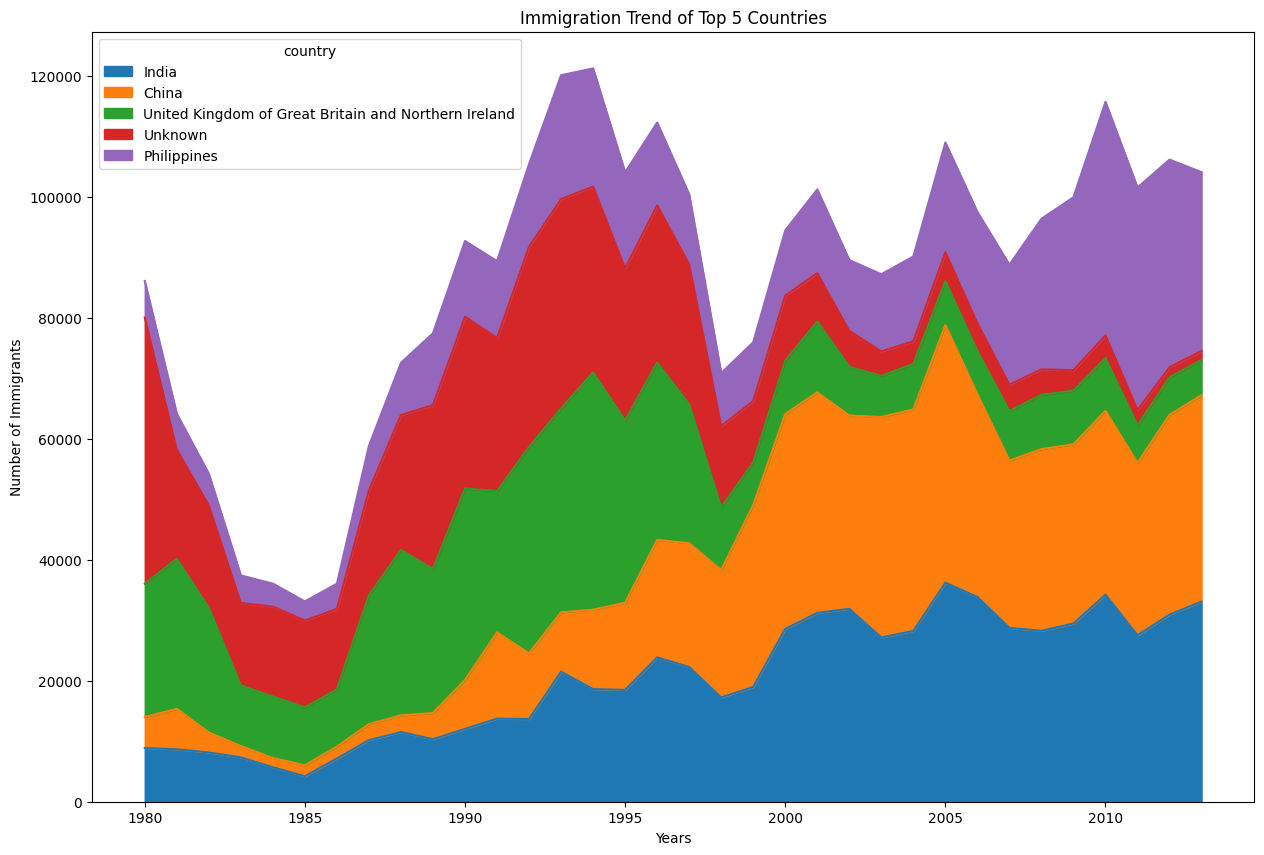

In [ ]:
top_country.plot(kind = 'area', stacked=True , figsize=(15,10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.

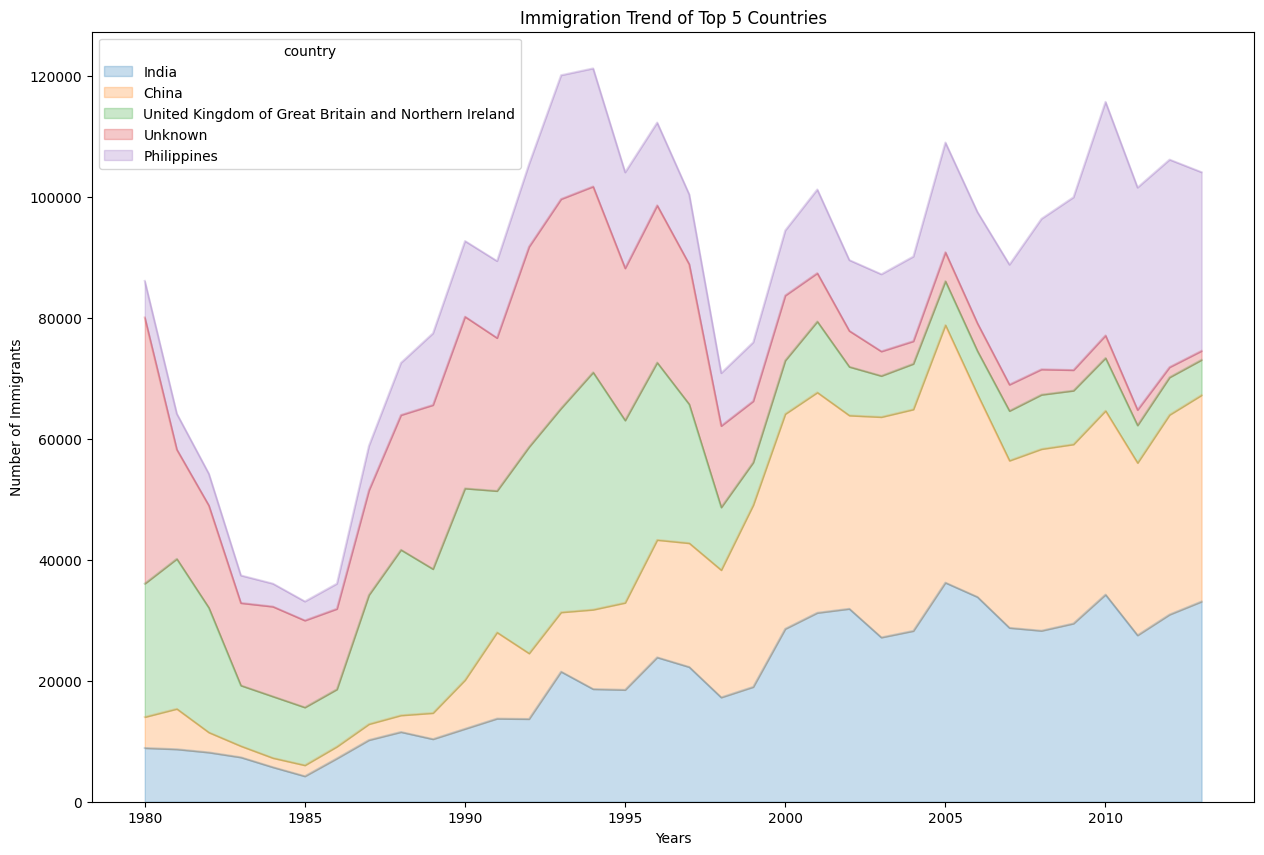

In [ ]:
top_country.plot(kind = 'area',alpha=0.25, stacked=True , figsize=(15,10))  # 0 - 1, default value alpha = 0.5

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Two types of plotting**

As we discussed in the video lectures, there are two styles/options of plotting with matplotlib， plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'**

You can use plt i.e. matplotlib.pyplot and add more elements by calling different methods procedurally; for example, plt.title(...) to add title or plt.xlabel(...) to add label to the x-axis.

    # Option 1: This is what we have been using so far
    top_country.plot(kind='area', alpha=0.35, figsize=(20, 10))
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
**Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred)**

You can use an Axes instance of your current plot and store it in a variable (eg. ax). You can add more elements by calling methods with a little change in syntax (by adding "set_" to the previous methods). For example, use ax.set_title() instead of plt.title() to add title, or ax.set_xlabel() instead of plt.xlabel() to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

In this course, we will stick to the scripting layer, except for some advanced visualizations where we will need to use the artist layer to manipulate advanced aspects of the plots.

    # option 2: preferred option with more flexibility
    ax = top_country.plot(kind='area', alpha=0.35, figsize=(20, 10))
    ax.set_title('Immigration trend of top 5 countries')
    ax.set_ylabel('Number of immigrants')
    ax.set_xlabel('Years')

##**Histograms**

A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

**Question**: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [ ]:
data['2013'].head(5)

country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Unknown                                                  1484
Philippines                                             29544
Name: 2013, dtype: int64

In [ ]:
count, bin_edges = np.histogram(data['2013'])
print(count, bin_edges)

[179  11   1   2   0   0   0   0   1   2] [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the histrogram method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

178 countries contributed between 0 to 3412.9 immigrants
11 countries contributed between 3412.9 to 6825.8 immigrants
1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

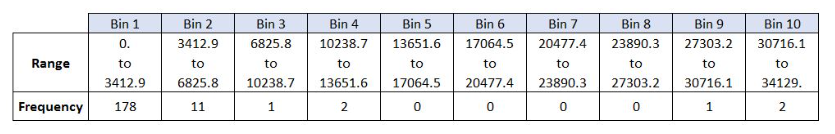


We can easily graph this distribution by passing kind=hist to plot().

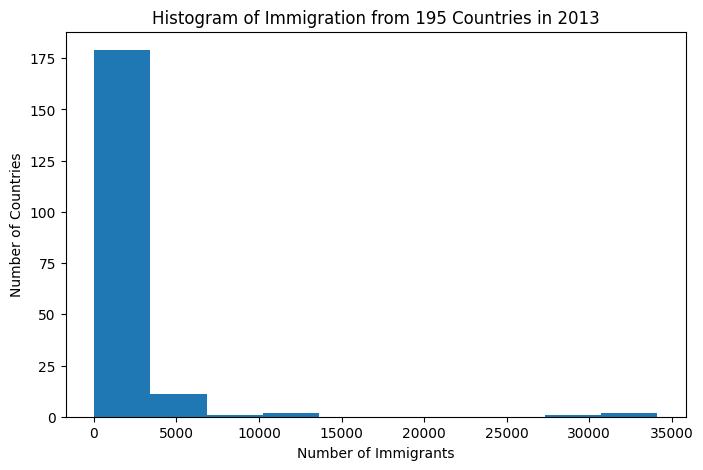

In [ ]:
data['2013'].plot(kind='hist', figsize=(8,5))

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

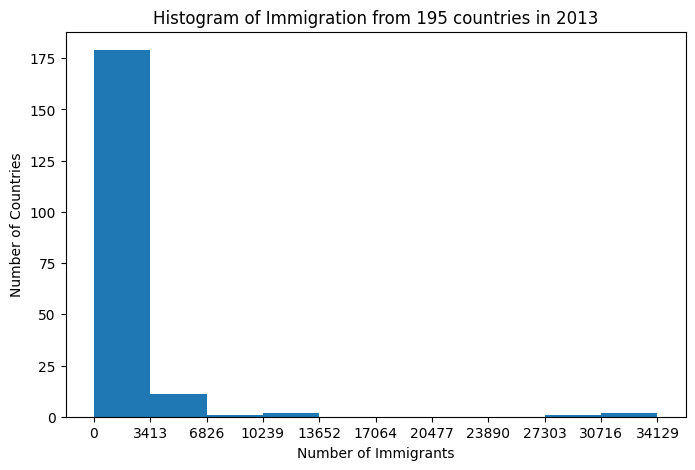

In [ ]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(data['2013'])

data['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

- increase the bin size to 15 by passing in bins parameter;
- set transparency to 60% by passing in alpha parameter;
- label the x-axis by passing in x-label parameter;
- change the colors of the plots by passing in color parameter.

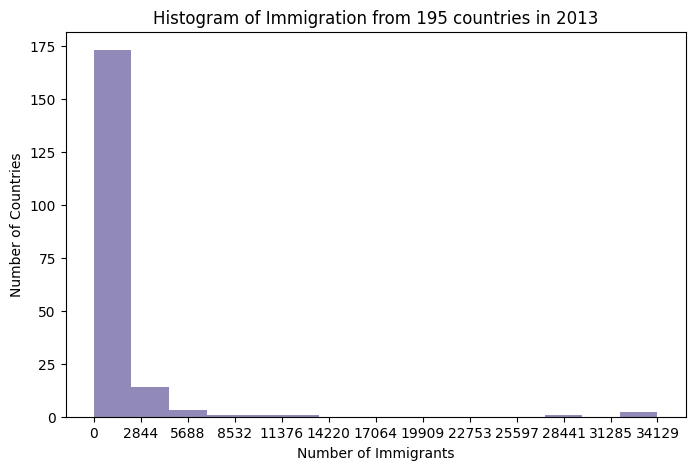

In [ ]:
count, bin_edges = np.histogram(data['2013'],12)

data['2013'].plot(kind='hist',bins=15,alpha=0.6,color=['darkslateblue'],figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

##**Bar Charts**

A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via kind parameter in plot():

- kind=bar creates a vertical bar plot
- kind=barh creates a horizontal bar plot

**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's start off by analyzing the effect of Iceland's Financial Crisis**:

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question**: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

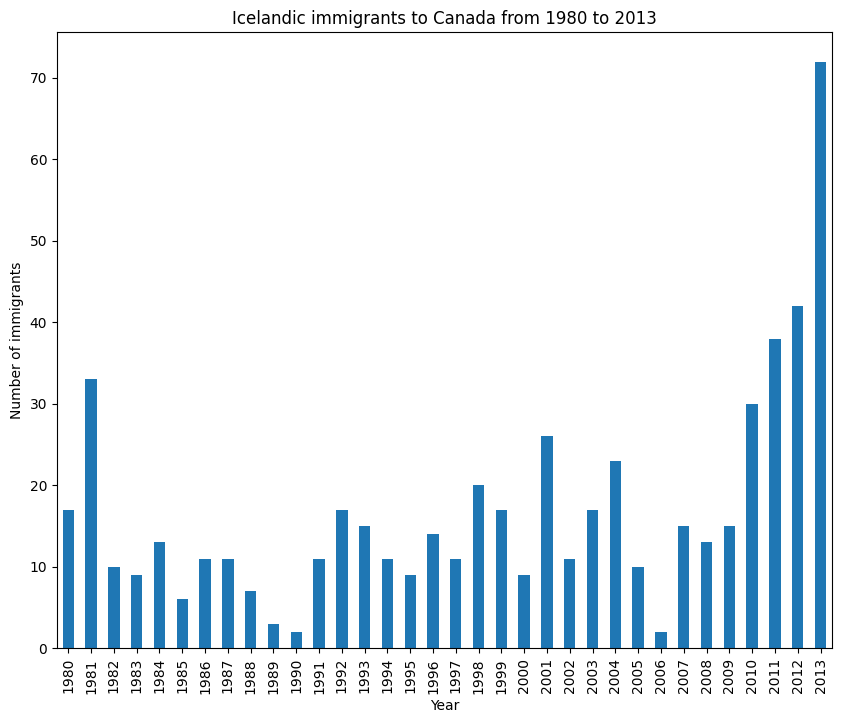

In [ ]:
iceland = data.loc['Iceland', years]

iceland.plot(kind='bar', figsize=(10,8))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the annotate method of the scripting layer or the pyplot interface. We will pass in the following parameters:

- s: str, the text of annotation.
- xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- arrowprops: Takes a dictionary of properties to draw the arrow:
- arrowstyle: Specifies the arrow style, '->' is standard arrow.
- connectionstyle: Specifies the connection type. arc3 is a straight line.
- color: Specifies color of arrow.
- lw: Specifies the line width.

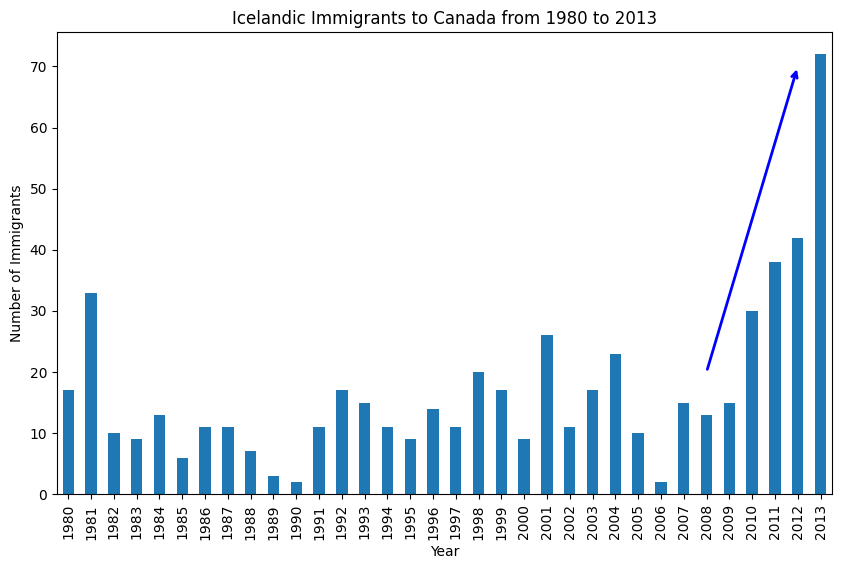

In [ ]:
iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

Let's also annotate a text to go over the arrow. We will pass in the following additional parameters:

- rotation: rotation angle of text in degrees (counter clockwise)
- va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

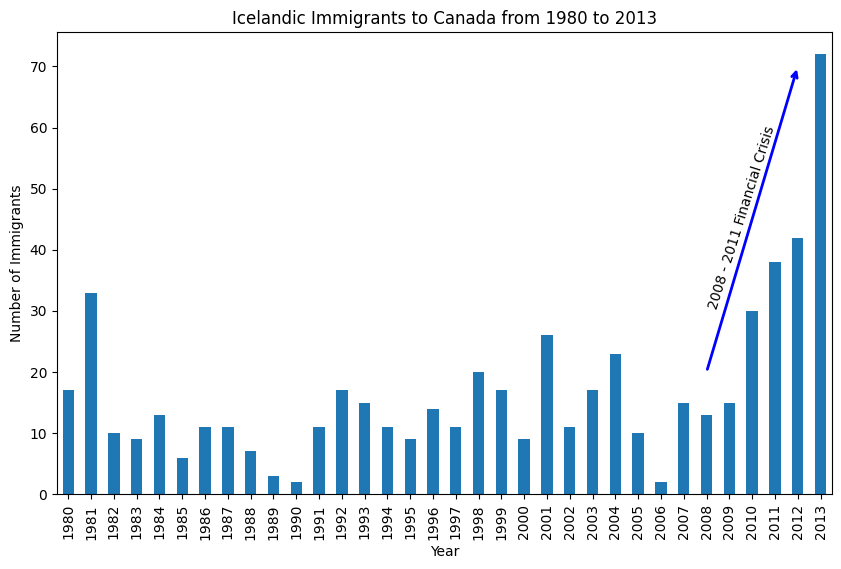

In [ ]:
iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

##**Horizontal Bar Plot**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to label categorical variables.

Question: Using the scripting later and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [ ]:
data.sort_values(by='Total_', ascending=True, inplace=True)

top_15 = data['Total_'].tail(15)
top_15

country
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
Unknown                                                 515059
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total_, dtype: int64

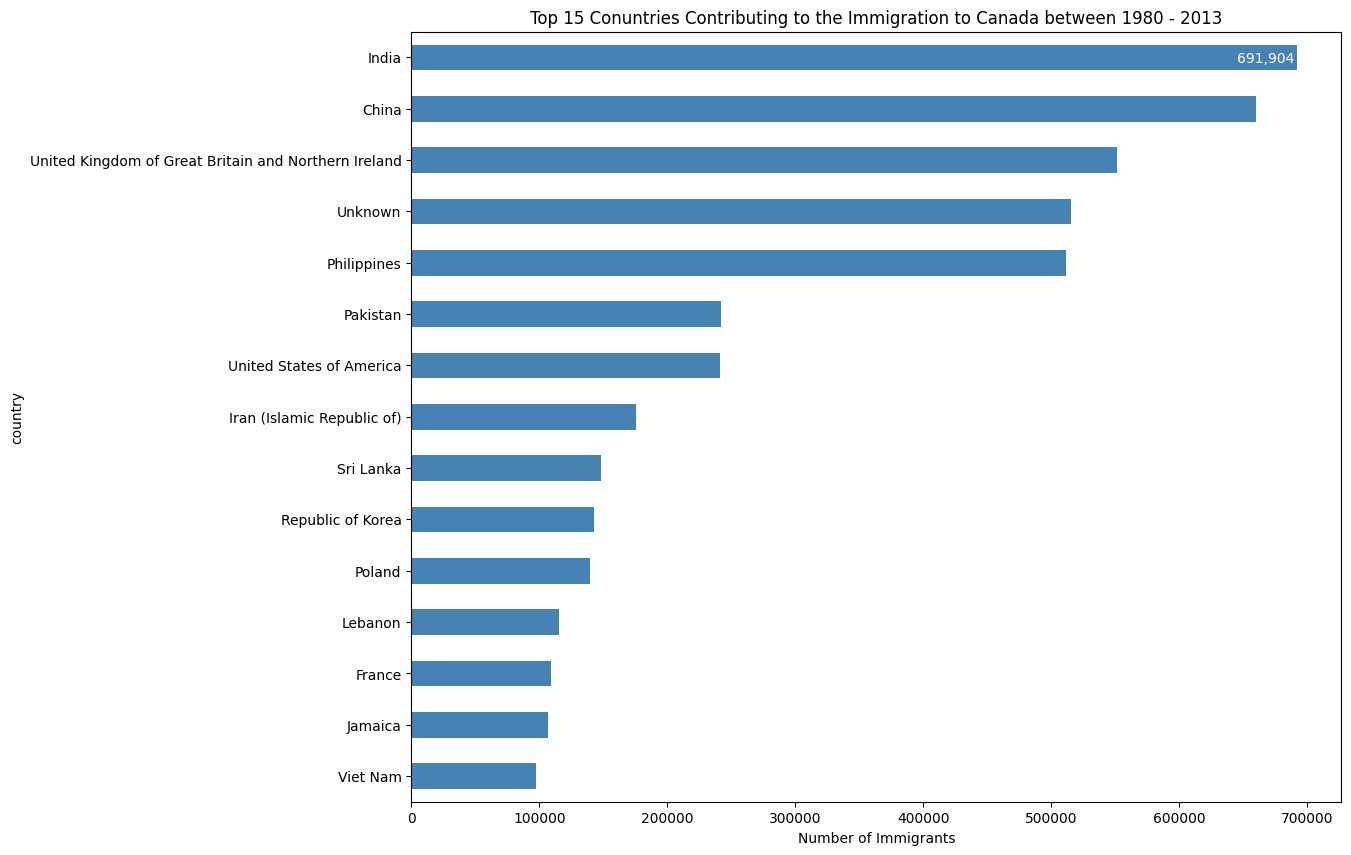

In [ ]:
top_15.plot(kind='barh', figsize=(12,10), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

 # annotate value labels to each country
for index,value in enumerate(top_15):
   label = format(int(value), ',')

    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

##**Pie Charts**

A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

Step 1: Gather data.

We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

- Split: Splitting the data into groups based on some criteria.
- Apply: Applying a function to each group independently: .sum() .count() .mean() .std() .aggregate() .apply() .etc..
- Combine: Combining the results into a data structure.


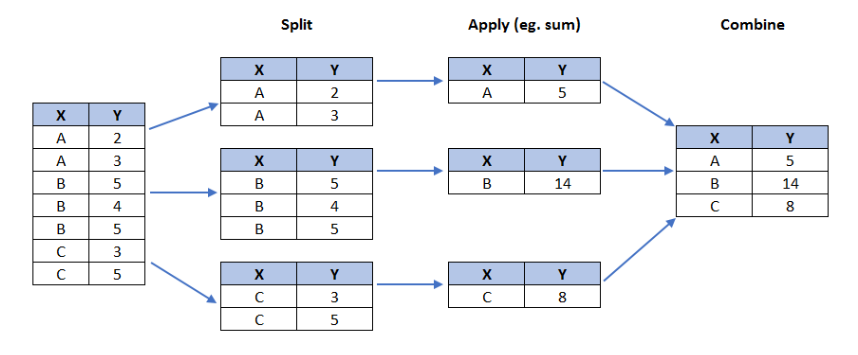

In [ ]:
continent = data.groupby('continent', axis=0,).sum()

# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum())
print(type(data.groupby('continent', axis = 0)))

continent.head(7)


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<ipython-input-146-33bd2f89a2ac>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_
continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174
World,44000,18078,16904,13635,14855,14368,13303,17304,22279,27118,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


In [ ]:
continent_shape = continent.shape
print(continent.shape)


(7, 35)


Step 2: Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

- autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
- startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- shadow - Draws a shadow beneath the pie (to give a 3D feel).
- Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
- Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
- Pass in a custom set of colors for continents by passing in colors parameter.
- Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in explode parameter.

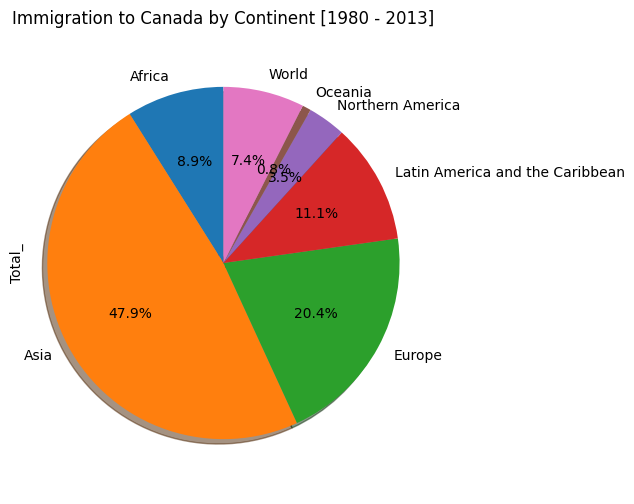

In [ ]:
# autopct create %, start angle represent starting point
continent['Total_'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

improved chart

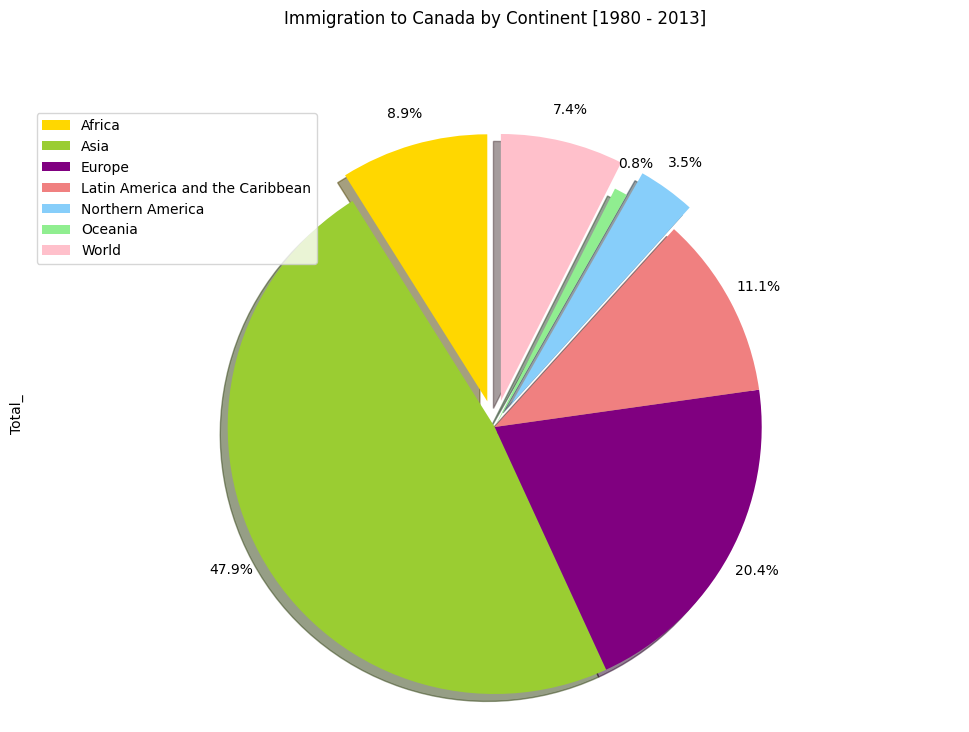

In [ ]:
color_list = ['gold', 'yellowgreen','purple', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1,0, 0.1,]  # gap btw each slice

continent['Total_'].plot(kind='pie',
                        figsize=(12,8),
                        autopct='%1.1f%%',      # add in percentages
                        startangle=90,          # start angle 90° (Africa)
                        shadow=True,            # add shadow
                        labels=None,            # turn off labels on pie chart
                        pctdistance=1.12,       # the ratio between the center of each pie slice and the start of the text generated by autopct
                        colors=color_list,      # add custom colors
                        explode = explode_list)   # 'explode' lowest 3 continents


# y=1.12 is gap btw graph and tittle
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=continent.index, loc='upper left')

plt.show()

##**Box Plots**

A box plot is a way of statistically representing the distribution of the data through five main dimensions:

- Minimum: The smallest number in the dataset excluding the outliers.
- First quartile: Middle number between the minimum and the median.
- Second quartile (Median): Middle number of the (sorted) dataset.
- Third quartile: Middle number between median and maximum.
- Maximum: The largest number in the dataset excluding the outliers.


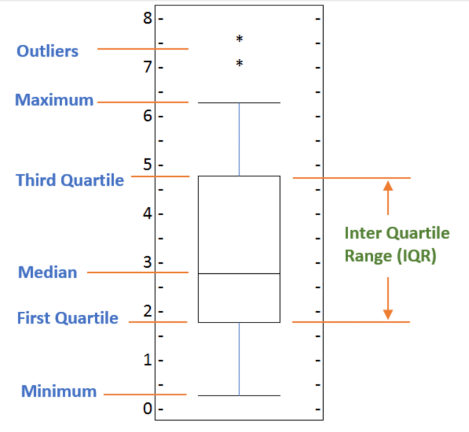

To make a boxplot, we can use kind=box in plot method invoked on a pandas series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.



In [ ]:
af_japan = data.loc[['Japan'],years].transpose()
af_japan

country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198
1986,248
1987,422
1988,324
1989,494


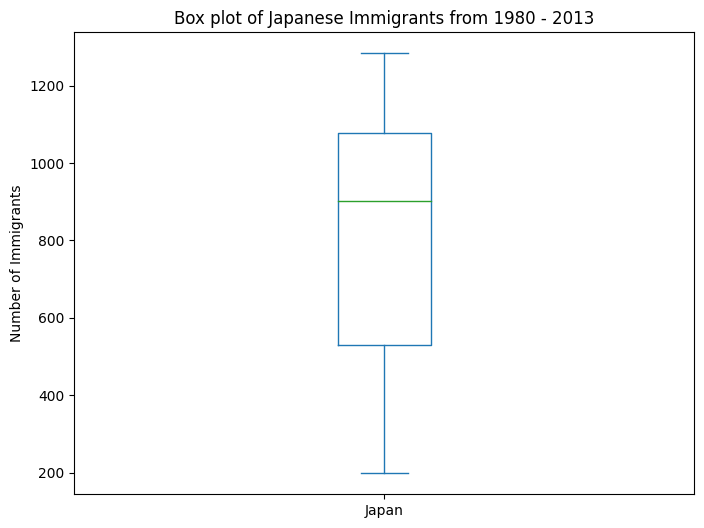

In [ ]:
af_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

few key observations from the plot above:

- The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
- 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
- 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

We can view the actual numbers by calling the describe() method on the dataframe.

In [ ]:
af_japan.describe()

country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


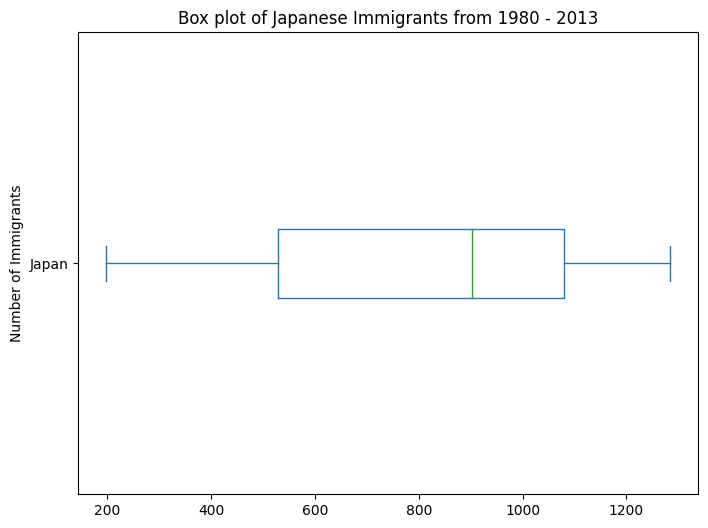

In [ ]:
af_japan.plot(kind='box', figsize=(8, 6), vert=False)

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

##**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

Typical syntax is :

    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
Where

- nrows and ncols are used to notionally split the figure into (nrows * ncols) sub-axes,
- plot_number is used to identify the particular subplot that this function is to create within the notional grid. plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols as shown below.


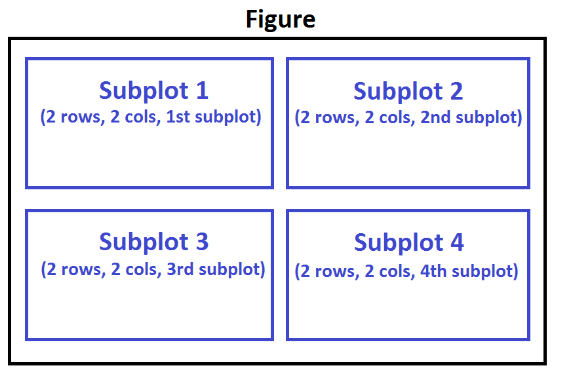

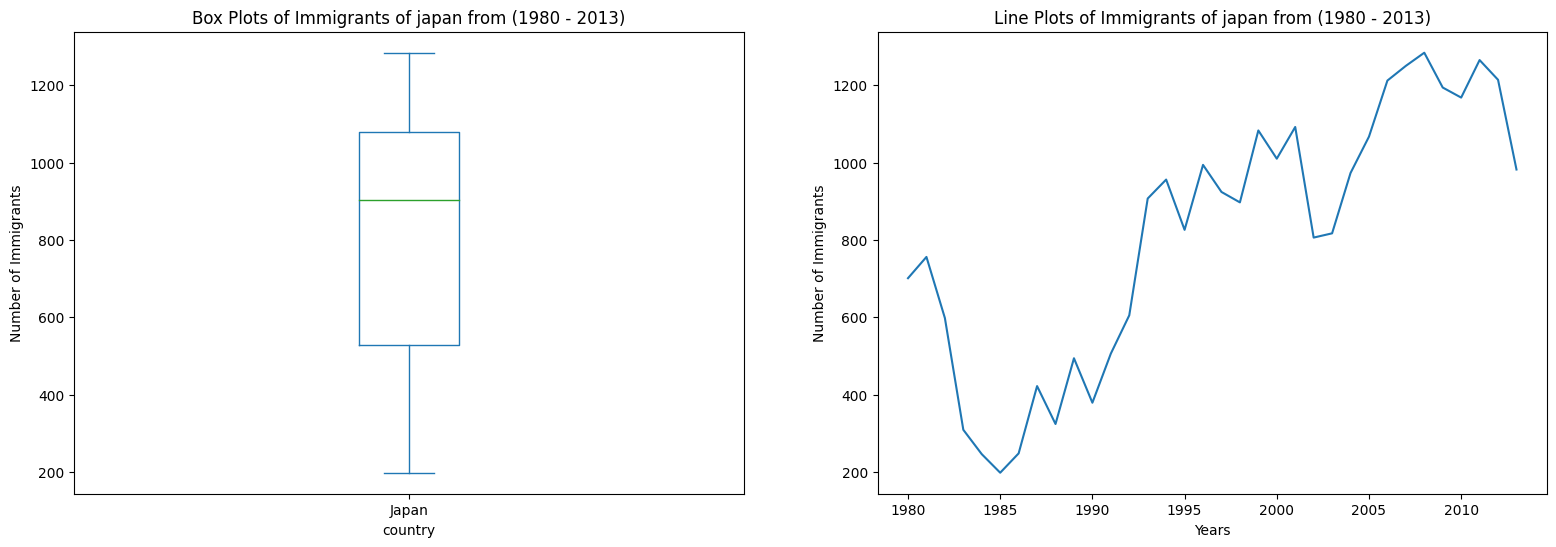

In [ ]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Subplot 1: Box plot
af_japan.plot(kind='box', figsize=(20, 6), ax=ax0)
ax0.set_title('Box Plots of Immigrants of japan from (1980 - 2013)')
ax0.set_xlabel('country')
ax0.set_ylabel('Number of Immigrants')

# Subplot 2: Line plot
country.plot(kind='line',figsize=(19, 6), ax=ax1 )
ax1.set_title ('Line Plots of Immigrants of japan from (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

Tip regarding subplot convention

In the case when nrows, ncols, and plot_number are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent nrows, the tens represent ncols and the units represent plot_number. For instance,

   subplot(211) == subplot(2, 1, 1)
   
produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

Let's try something a little more advanced.

Previously we identified the top 15 countries based on total immigration from 1980 - 2013.

In [ ]:
df_top15 = data.sort_values(['Total_'], ascending=False, axis=0).head(15)
df_top15

,continent,region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Unknown,World,World,44000,18078,16904,13635,14855,14368,13303,17304,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [ ]:
# create a list of all years in decades 80's, 90's, and 00's

years_80s = list(map(str, range(1980,1990)))
years_90s = list(map(str, range(1990,2000)))
years_00s = list(map(str, range(2000,2010)))

# slice the original dataframe 'data' to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_data = pd.DataFrame({'1980s':df_80s, '1990s': df_90s, '2000s':df_00s })
new_data.head()

,1980s,1990s,2000s
country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Unknown,201844,249985,53780
Philippines,60764,138482,172904


In [ ]:
new_data.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,57367.066667,100016.400000,98022.533333
std,58707.863270,78556.702512,100300.494326
min,10591.000000,30028.000000,13629.000000
25%,19307.000000,44787.000000,36101.500000
50%,32003.000000,64864.000000,65794.000000
75%,68794.000000,150005.000000,105505.500000
max,201844.000000,261966.000000,340385.000000


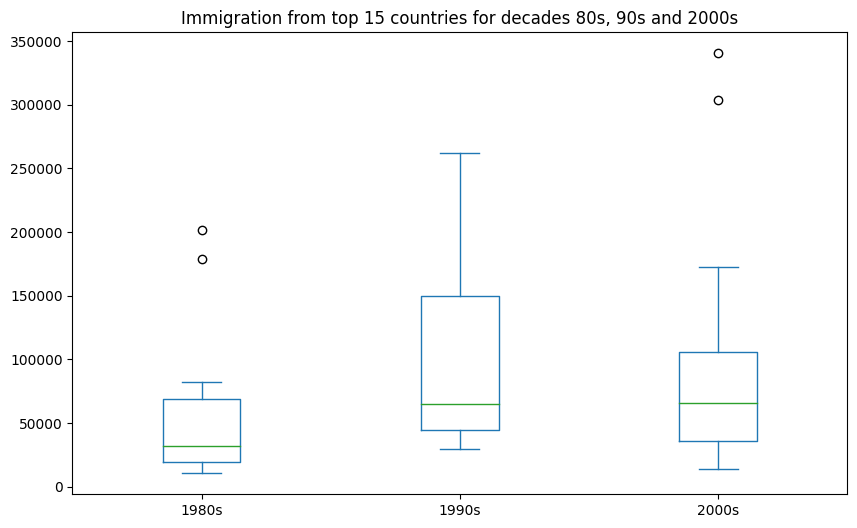

In [ ]:
new_data.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

- larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
- smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example:

- Q1 (25%) = 36,101.5
- Q3 (75%) = 105,505.5
- IQR = Q3 - Q1 = 69,404

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

- Outlier > 105,505.5 + (1.5 * 69,404)
- Outlier > 209,611.5

#Scatter Plots

*A scatter plot (2D) is a useful method of comparing variables against each other. Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset*.

**Let's start by exploring the following**:

*Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013*.

**Step 1**: *Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type*.

In [ ]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(data[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['years','total']
df_tot.head()

,years,total
0,1980,143137
1,1981,128641
2,1982,121175
3,1983,89185
4,1984,88272


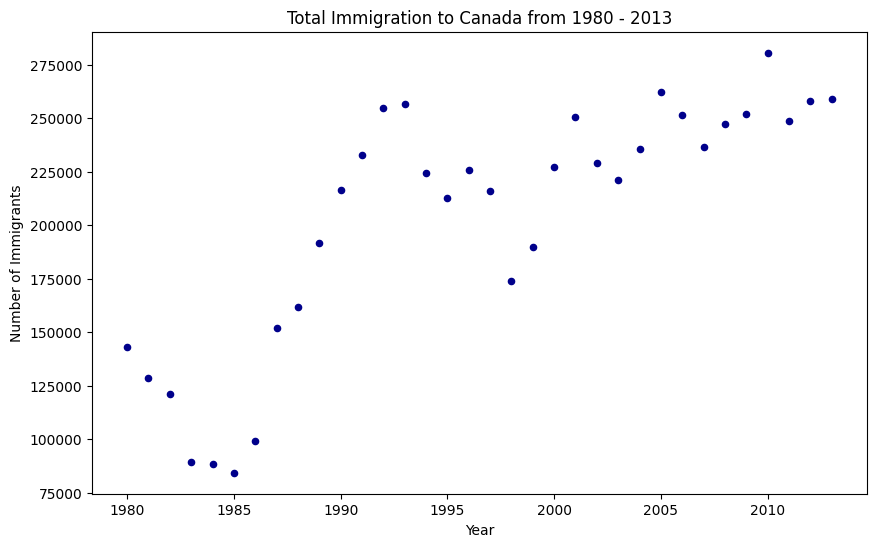

In [ ]:
df_tot.plot(kind='scatter', x='years', y='total', figsize=(10,6), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

*Notice how the scatter plot does not connect the data points together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit*).

*So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015*.

**Step 1**: *Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following*:

- *x: x-coordinates of the data*.

- *y: y-coordinates of the data*.

- *deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on*

In [ ]:
x = df_tot['years']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 4.76402506e+03, -9.30772273e+06])

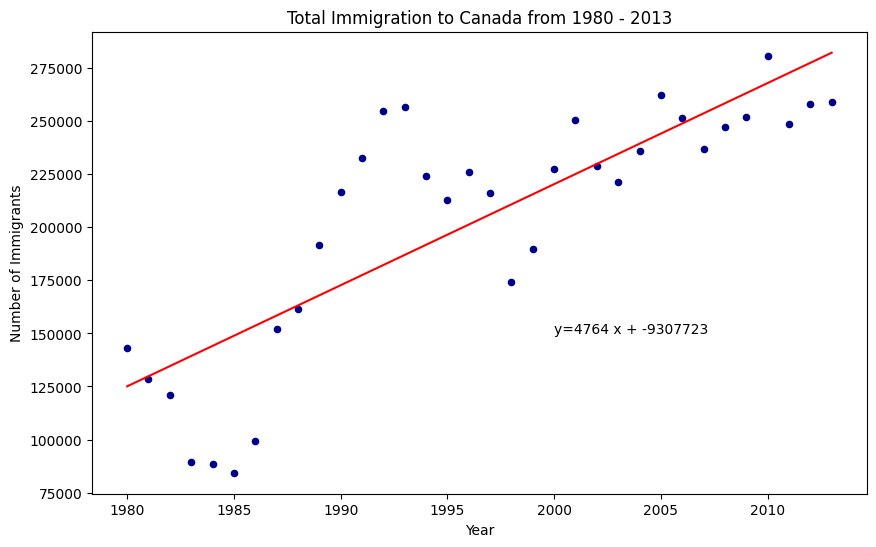

'No. Immigrants = 4764 * Year + -9307723'

In [ ]:
df_tot.plot(kind='scatter', x='years', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

#Waffle Charts

*A waffle chart is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard*.

*Let's revisit the previous case study about Denmark, Norway, and Sweden*.

In [ ]:
df_waffle = data.loc[['Denmark','Norway','Sweden']]
df_waffle

,continent,region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_
country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,272,293,299,106,93,73,93,109,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,116,77,106,51,31,54,56,80,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,281,308,222,176,128,158,187,198,...,205,139,193,165,167,159,134,140,140,5866


*Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.*

In [ ]:
# compute the proportion of each category with respect to the total
total_values = df_waffle['Total_'].sum()
category_proportions = df_waffle['Total_']/total_values    # we simply calculate total sum and divide each country total to total sum to find there proportion

pd.DataFrame({'category proportion': category_proportions})

,category proportion
country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


*Step 2. The second step is defining the overall size of the waffle chart.*

In [ ]:
width = 40
height = 10
total_tiles = width*height

print(f'Total no of tiles is {total_tiles}.')

Total no of tiles is 400.


*Step 3. The third step is using the proportion of each category to determe it respective number of tiles*

In [ ]:
tiles_per_category = (category_proportions*total_tiles).round().astype(int)

pd.DataFrame({'no of tiles':tiles_per_category })

,no of tiles
country,
Denmark,129
Norway,77
Sweden,194


*Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.*

In [ ]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height,width), dtype=np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
   for row in range(height):
      tile_index += 1

# if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
      if tile_index > sum(tiles_per_category[0:category_index]):
         category_index += 1  # ...proceed to the next category

 # set the class value to an integer, which increases with class
      waffle_chart[row,col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [ ]:
#Let's take a peek at how the matrix looks like.
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.

*Step 5. Map the waffle chart matrix into a visual*.

<Figure size 640x480 with 0 Axes>

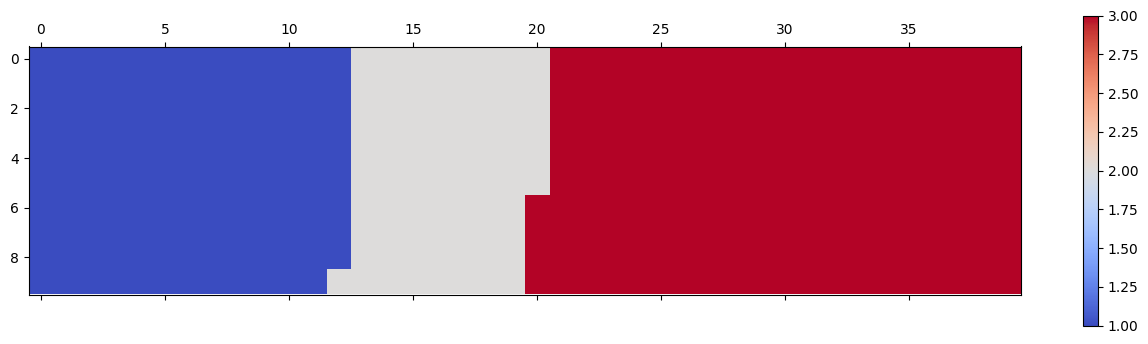

In [ ]:
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

*Step 6. Prettify the chart.*

<Figure size 640x480 with 0 Axes>

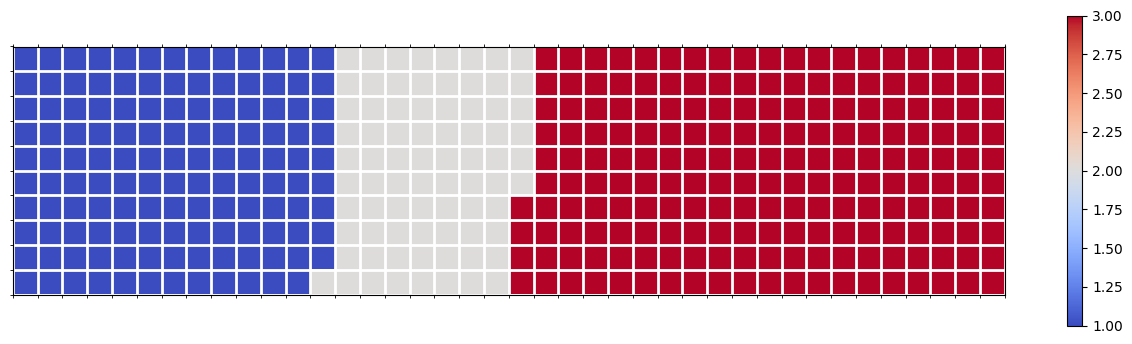

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

*Step 7. Create a legend and add it to chart.*

<Figure size 640x480 with 0 Axes>

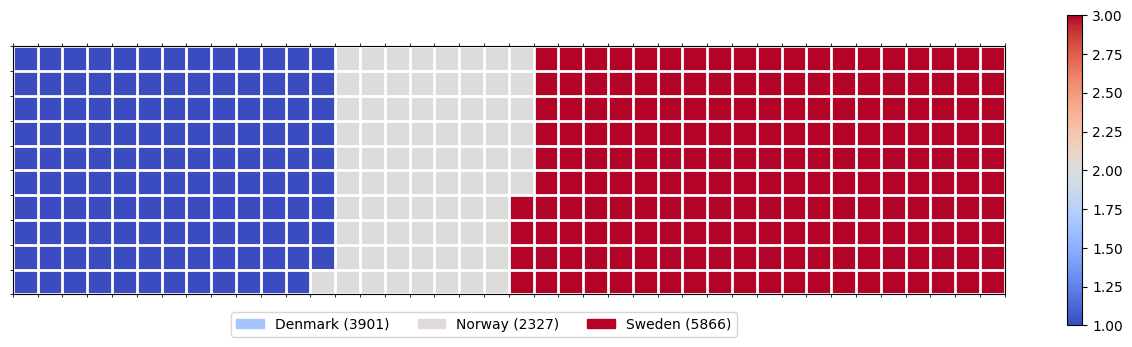

In [ ]:
import matplotlib.patches as mpatches

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_waffle['Total_'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_waffle.index.values):
    label_str = category + ' (' + str(df_waffle['Total_'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_waffle.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

*Now it would very inefficient to repeat these seven steps every time we wish to create a waffle chart. So let's combine all seven steps into one function called create_waffle_chart. This function would take the following parameters as input*:

- categories: Unique categories or classes in dataframe.
- values: Values corresponding to categories or classes.
- height: Defined height of waffle chart.
- width: Defined width of waffle chart.
- colormap: Colormap class
- value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.

In [ ]:
def create_waffle_chart(categories,values,height,width,colormap,value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value)/total_values) for value in values]

    # compute the total number of tiles
    total_tiles = width*height
    print('total no of tiles is',total_tiles )

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion*total_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_waffle.index.values[i]+ ': ' + str(tiles))

      # initialize the waffle chart as an empty matrix
        waffle_chart = np.zeros((height, width))

      # define indices to loop through waffle chart
        category_index = 0
        tile_index = 0

       # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

# set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

     # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

*Now to create a waffle chart, all we have to do is call the function create_waffle_chart. Let's define the input parameters:*

In [ ]:
width = 40 # width of chart
height = 10 # height of chart
categories = df_waffle.index.values # categories
values = df_waffle['Total_'] # correponding values of categories
colormap = plt.cm.coolwarm # color map class

total no of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

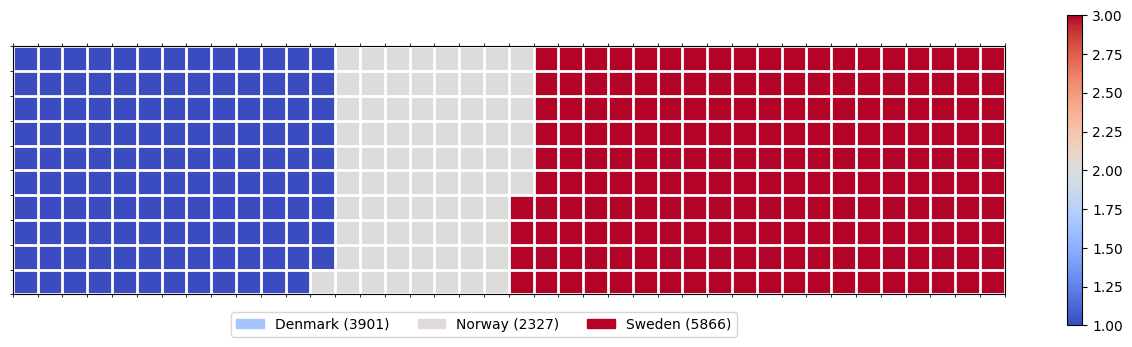

In [ ]:
create_waffle_chart(categories, values, height, width, colormap)

#Folium

*Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.*

In [ ]:
#!pip3 install folium==0.5.0
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [ ]:
world_map = folium.Map()
world_map

*All locations on a map are defined by their respective Latitude and Longitude values. So you can create a map and pass in a center of Latitude and Longitude values of* [0, 0].

*For a defined center, you can also define the initial zoom level into that location when the map is rendered. The higher the zoom level the more the map is zoomed into the center*.

*Let's create a map centered around Canada and play with the zoom level to see how it affects the rendered map*.

In [ ]:
world_map = folium.Map(location=[56.1304,-106.3468], zoom_start=4)
world_map

**Stamen Toner Maps**

*These are high-contrast B+W (black and white) maps. They are perfect for data mashups and exploring river meanders and coastal zones.*

In [ ]:
world_map = folium.Map(location=[56.1304,-106.3468], zoom_start=4, tiles='Stamen Toner')
world_map

**Stamen Terrain Maps**

*These are maps that feature hill shading and natural vegetation colors. They showcase advanced labeling and linework generalization of dual-carriageway roads.*

In [ ]:
world_map = folium.Map(location=[56.1304,-106.3468], zoom_start=4, tiles='Stamen Terrain')
world_map

**Maps with Markers**

*Let's download and import the data on police department incidents using pandas read_csv() method.*

*Download the dataset and read it into a pandas dataframe*:

In [ ]:
police_data = pd.read_csv('/content/Police_Department_Incidents_-_Previous_Year__2016_.csv')
police_data

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200583e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200583e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410593e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600137e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600027e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24116,160068695,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,01/24/2016 12:00:00 AM,14:10,TARAVAL,"ARREST, BOOKED",3200 Block of 20TH AV,-122.475647,37.728528,"(37.7285280627465, -122.475647460786)",1.600687e+13
24117,160068695,OTHER OFFENSES,POSSESSION OF BURGLARY TOOLS,Sunday,01/24/2016 12:00:00 AM,14:10,TARAVAL,"ARREST, BOOKED",3200 Block of 20TH AV,-122.475647,37.728528,"(37.7285280627465, -122.475647460786)",1.600687e+13
24118,160068764,KIDNAPPING,CHILD STEALING,Sunday,01/24/2016 12:00:00 AM,14:00,NORTHERN,NONE,900 Block of GROVE ST,-122.432211,37.776599,"(37.7765986594868, -122.43221126152)",1.600688e+13
24119,160068770,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Sunday,01/24/2016 12:00:00 AM,15:07,PARK,"ARREST, BOOKED",HAIGHT ST / STANYAN ST,-122.453535,37.769166,"(37.7691662978052, -122.45353456066)",1.600688e+13


- IncidntNum: Incident Number
- Category: Category of crime or incident
- Descript: Description of the crime or incident
- DayOfWeek: The day of week on which the incident occurred
- Date: The Date on which the incident occurred
- Time: The time of day on which the incident occurred
- PdDistrict: The police department district
- Resolution: The resolution of the crime in terms whether the perpetrator was arrested or not
- Address: The closest address to where the incident took place
- X: The longitude value of the crime location
- Y: The latitude value of the crime location
- Location: A tuple of the latitude and the longitude values
- PdId: The police department ID

In [ ]:
#Let's find out how many entries there are in our dataset.
police_data.shape

(24121, 13)

In [ ]:
#In order to reduce computational cost, let's just work with the first 100 incidents in this dataset.
limit = 100
police_data = police_data.iloc[0:limit]

In [ ]:
police_data.shape

(100, 13)

In [ ]:
# let's visualize where these crimes took place in the city of San Francisco. We will use the default style, and we will initialize the zoom level to 12.
latitude = 37.77
longitude = -122.42

In [ ]:
san_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
san_map

*Now let's superimpose the locations of the crimes onto the map. The way to do that in Folium is to create a feature group with its own features and style and then add it to the sanfran_map.*

In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat,lng, in zip(police_data.Y, police_data.X):
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat,lng],
            radius = 5,
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )

san_map.add_child(incidents)

In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(police_data.Y, police_data.X):
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(police_data.Y)
longitudes = list(police_data.X)
labels = list(police_data.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(san_map)

# add incidents to map
san_map.add_child(incidents)

*To implement this, we start off by instantiating a MarkerCluster object and adding all the data points in the dataframe to this object.*

In [ ]:
from folium import plugins
# let's start again with a clean copy of the map of San Francisco

sanfr_map = folium.Map(location = [latitude,longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfr_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(police_data.Y, police_data.X, police_data.Category):
   folium.Marker(
      location = [lat,lng],
      icone = None,
      popup = label,
   ).add_to(incidents)

sanfr_map


#Choropleth Maps

*A Choropleth map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area, or it shows the level of variability within a region. Below is a Choropleth map of the US depicting the population by square mile per state*.




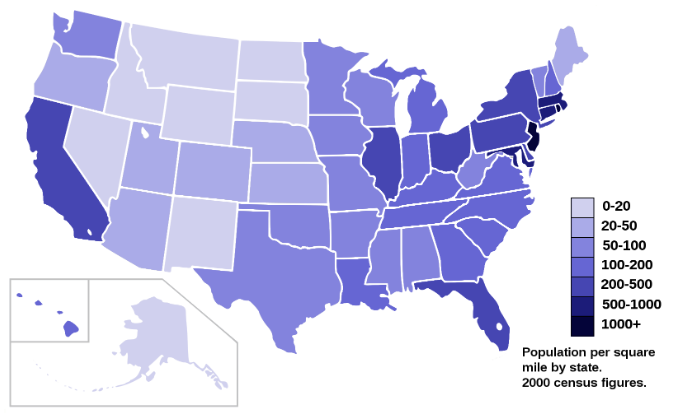

*Now, let's create our own Choropleth map of the world depicting immigration from various countries to Canada*

In [ ]:
can_data = pd.read_excel('/content/Canada.xlsx')

can_data.drop(['Type','Coverage','AREA','REG','DEV','DevName'], axis=1,inplace=True)

can_data.rename(columns={'OdName':'country', 'AreaName':'continent','RegName':'region'}, inplace=True)

can_data['Total_'] = can_data.sum(axis=1)
can_data.head()

<ipython-input-189-af98e9e13b4f>:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,country,continent,region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
can_data.shape

(196, 38)

In [ ]:
# download countries geojson file from kaggel and import python
import json

with open('world_countries.json', 'r') as f:
    world_geo = json.load(f)


print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [ ]:
world_map = folium.Map()

choropleth = folium.Choropleth(
    geo_data = world_geo,
    data=can_data,
    columns=['country', 'Total_'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

world_map.add_child(choropleth)

world_map


In [ ]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(can_data['Total_'].min(),
                              can_data['Total_'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=can_data,
    columns=['country', 'Total_'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



#working with Dash


In [ ]:
!pip install pandas dash
!pip3 install httpx==0.20 dash plotly

- **TASK 1 - Data Preparation**

In [ ]:
import pandas as pd
import plotly.express as px
import dash
import dash_html_components as html
import dash_core_components as dcc

<ipython-input-3-9bb5336ead14>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-3-9bb5336ead14>:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [ ]:
airline_data = pd.read_csv('/content/airline_data.csv')

data = airline_data.sample(n=500, random_state = 42)

In [ ]:
fig = px.pie(data, values='Flights', names='DistanceGroup', title='Distance group proportion by flights')

- **TASK 2 - Create dash application and get the layout skeleton**

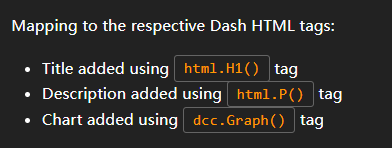

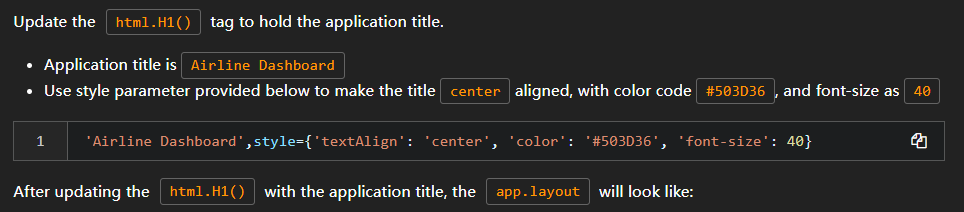

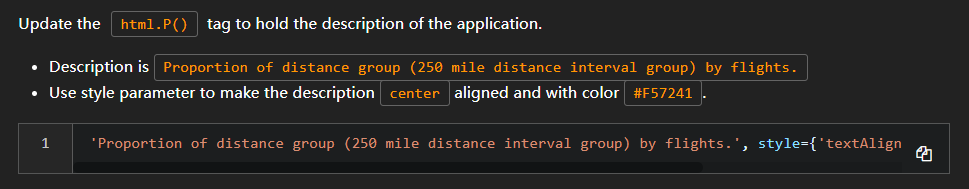

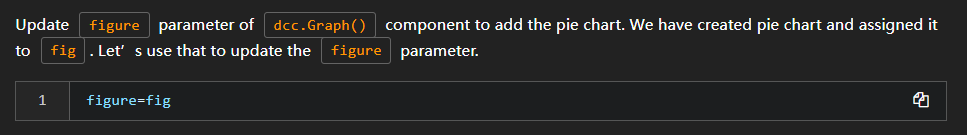

In [ ]:
app = dash.Dash(__name__)

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add description about the graph using HTML P (paragraph) component
# Finally, add graph component

app.layout = html.Div(children = [html.H1('Airline Dashboard',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
                                  html.P('Proportion of distance group (250 mile distance interval group) by flights.', style={'textAlign':'center', 'color': '#F57241'}),
                                  dcc.Graph(figure=fig),
                                  ])

if __name__  == '__main__':
  app.run_server()

<IPython.core.display.Javascript object>

In [ ]:
# Import required libraries
import pandas as pd
import plotly.graph_objects as go
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

# Read the airline data into the pandas dataframe
airline_data =  pd.read_csv('/content/airline_data.csv',
                            dtype={'Div1Airport': str, 'Div1TailNum': str,
                                   'Div2Airport': str, 'Div2TailNum': str})
# Create a dash applicationSS
app = dash.Dash(__name__)

app.layout = html.Div(children=[ html.H1('Airline Performance Dashboard',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010',
                                type='number', style={'height':'50px', 'font-size': 35}),],
                                style={'font-size': 40}),
                                html.Br(),
                                html.Br(),
                                html.Div(dcc.Graph(id='line-plot')),
                                ])

# add callback decorator
@app.callback( Output(component_id='line-plot', component_property='figure'),
               Input(component_id='input-year', component_property='value'))


# Add computation to callback function and return graph
def get_graph(entered_year):
    # Select 2019 data
    df =  airline_data[airline_data['Year']==int(entered_year)]


    # Group the data by Month and compute average over arrival delay time.
    line_data = df.groupby('Month')['ArrDelay'].mean().reset_index()

    fig = go.Figure(data=go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
    fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
    return fig


# Run the app
if __name__ == '__main__':
    app.run_server()

<IPython.core.display.Javascript object>

In [ ]:
airline_data =  pd.read_csv('/content/airline_data.csv')
app = dash.Dash(__name__)
app.layout = html.Div(children = [ html.H1('Total number of flights to the destination state split by reporting airline',
                                  style = {'textAlign':'center', 'color':'#503D36', 'font-size':40}),
                                  html.Div(['Input year: ', dcc.Input(id='Input-Year', value='2010', type = 'number', style = {'height':'50px', 'font-size':40}),],
                                  style={'font-size':40}),
                                  html.Br(),
                                  html.Br(),
                                  html.Div(dcc.Graph(id='bar-plot')),
                                  ])

@app.callback(Output(component_id = 'bar-plot', component_property = 'figure'),
              Input(component_id = 'input-year', component_property = 'value'))

def get_graph(entered_year):
   df = airline_data[airline_data['year'] == int(entered_year)]
   bar_data = df.groupby('DestState')['Flights'].sum().reset_index()
   fig = px.bar(bar_data, x= "DestState", y= "Flights", title='Total number of flights to the destination state split by reporting airline')
   fig.update_layout(title='Flights to Destination State', xaxis_title='DestState', yaxis_title='Flights')
   return fig

if __name__ == '__main__':
    app.run_server()

<IPython.core.display.Javascript object>

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('/content/airline_data.csv',
                            encoding = "ISO-8859-1",
                            )

# Create a dash application
app = dash.Dash(__name__)

# Build dash app layout
app.layout = html.Div(children=[ html.H1('Flight Delay Time Statistics',
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 30}),

                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010',
                                type='number', style={'height':'35px', 'font-size': 30}),],
                                style={'font-size': 30}),

                                html.Br(),
                                html.Br(),
                                # Segment 1
                                html.Div([
                                        html.Div(dcc.Graph(id='carrier-plot')),
                                        html.Div(dcc.Graph(id='weather-plot'))
                                ], style={'display': 'flex'}),
                                # Segment 2
                                html.Div([
                                        html.Div(dcc.Graph(id='nas-plot')),
                                        html.Div(dcc.Graph(id='security-plot'))
                                ], style={'display': 'flex'}),
                                # Segment 3
                                html.Div(dcc.Graph(id='late-plot'), style={'width':'65%'})
                                ])

""" Compute_info function description

This function takes in airline data and selected year as an input and performs computation for creating charts and plots.

Arguments:
    airline_data: Input airline data.
    entered_year: Input year for which computation needs to be performed.

Returns:
    Computed average dataframes for carrier delay, weather delay, NAS delay, security delay, and late aircraft delay.

"""
def compute_info(airline_data, entered_year):
    # Select data
    df =  airline_data[airline_data['Year']==int(entered_year)]
    # Compute delay averages
    avg_car = df.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_NAS = df.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_sec = df.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    return avg_car, avg_weather, avg_NAS, avg_sec, avg_late

"""Callback Function

Function that returns fugures using the provided input year.

Arguments:

    entered_year: Input year provided by the user.

Returns:

    List of figures computed using the provided helper function `compute_info`.
"""
# Callback decorator
@app.callback( [
               Output(component_id='carrier-plot', component_property='figure'),
               Output(component_id='weather-plot', component_property='figure'),
               Output(component_id='nas-plot', component_property='figure'),
               Output(component_id='security-plot', component_property='figure'),
               Output(component_id='late-plot', component_property='figure')
               ],
               Input(component_id='input-year', component_property='value'))
# Computation to callback function and return graph
def get_graph(entered_year):

    # Compute required information for creating graph from the data
    avg_car, avg_weather, avg_NAS, avg_sec, avg_late = compute_info(airline_data, entered_year)

    # Line plot for carrier delay
    carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrrier delay time (minutes) by airline')
    # Line plot for weather delay
    weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average weather delay time (minutes) by airline')
    # Line plot for nas delay
    nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline', title='Average NAS delay time (minutes) by airline')
    # Line plot for security delay
    sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average security delay time (minutes) by airline')
    # Line plot for late aircraft delay
    late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average late aircraft delay time (minutes) by airline')

    return[carrier_fig, weather_fig, nas_fig, sec_fig, late_fig]

# Run the app
if __name__ == '__main__':
    app.run_server()

<IPython.core.display.Javascript object>

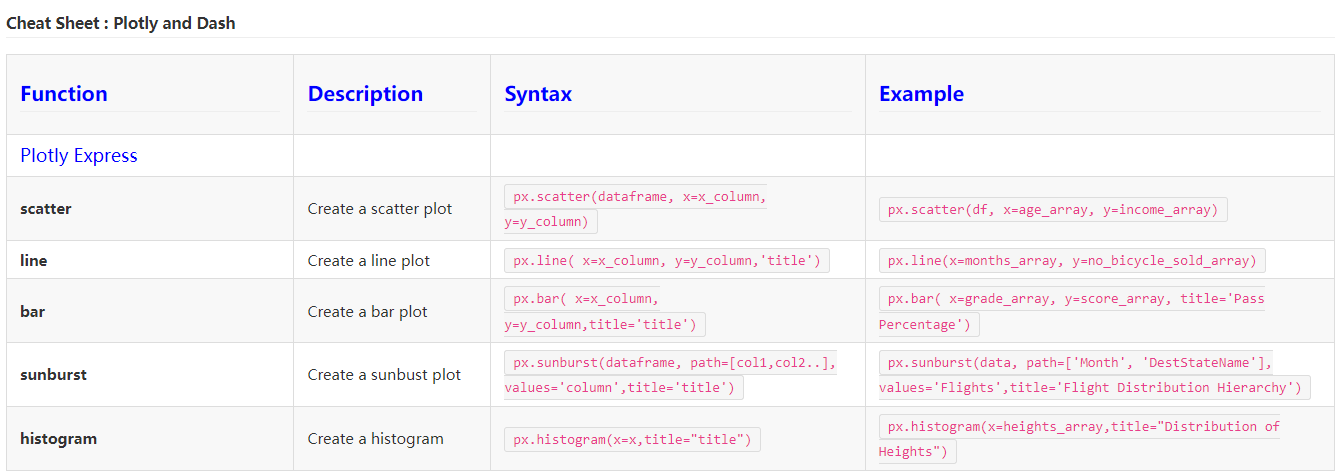

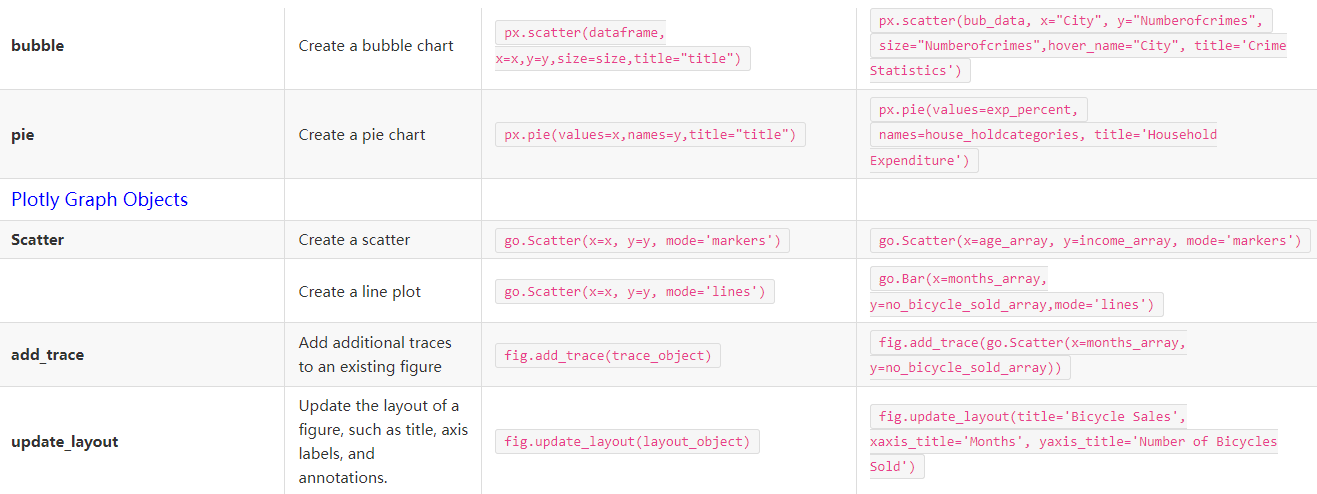

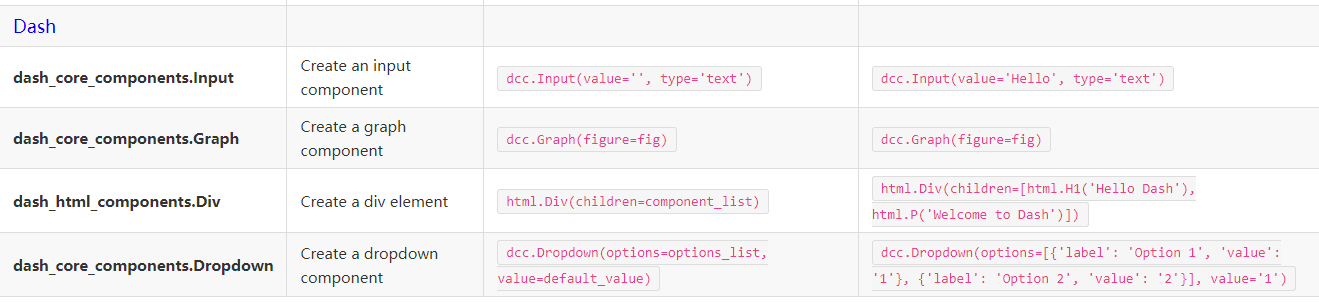